In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bjp-vs-congress-tweets/bjp_tweets.csv
/kaggle/input/bjp-vs-congress-tweets/congress_tweets.csv


In [2]:
bjp_df=pd.read_csv("/kaggle/input/bjp-vs-congress-tweets/bjp_tweets.csv")
congress_df=pd.read_csv("/kaggle/input/bjp-vs-congress-tweets/congress_tweets.csv")

In [3]:
# First analyzing with some rows
bjp_df = bjp_df[7000:11000]
congress_df = congress_df[13000:17000]

In [4]:
merg_df = pd.concat([bjp_df,congress_df],axis=0)

In [5]:
merg_df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
merg_df.sample(5)

,tweet,target
13775,day far rahul priyanka rahul gandhi also join bjp,1
7447,rajshreealok jeetensingh piyushgoy manojtiwari...,0
13211,opindiacom commit amp sacrific name incindia a...,1
9434,homi mous natsecjeff cow fuck anim fuck god ca...,0
14729,was parti work croni capitalist award project ...,1


In [7]:
merg_df.shape

(8000, 2)

In [8]:
merg_df.isna().sum()

tweet     0
target    0
dtype: int64

In [9]:
merg_df.duplicated().sum()

95

In [10]:
merg_df.drop_duplicates(inplace=True)

In [11]:
merg_df['clean_tweets'] = merg_df['tweet'].str.replace("[^a-zA-Z#]", " ")
merg_df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,tweet,target,clean_tweets
7000,modi govt pressur pakistan releas wg cdr abhin...,0,modi govt pressur pakistan releas wg cdr abhin...
7001,dear modi imrankhanpti pleas listen global lea...,1,dear modi imrankhanpti pleas listen global lea...
7002,joke centuri bjp nomin modi nobel peac prize,1,joke centuri bjp nomin modi nobel peac prize
7003,karnataka bjp chief b yeddyurappa airstrik hel...,1,karnataka bjp chief b yeddyurappa airstrik hel...
7004,rameesrammu congress bro damn lucki are make j...,0,rameesrammu congress bro damn lucki are make j...


In [12]:
merg_df=merg_df.drop(columns=['tweet'])
merg_df.head()

,target,clean_tweets
7000,0,modi govt pressur pakistan releas wg cdr abhin...
7001,1,dear modi imrankhanpti pleas listen global lea...
7002,1,joke centuri bjp nomin modi nobel peac prize
7003,1,karnataka bjp chief b yeddyurappa airstrik hel...
7004,0,rameesrammu congress bro damn lucki are make j...


In [13]:
merg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7905 entries, 7000 to 16999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   target        7905 non-null   int64 
 1   clean_tweets  7905 non-null   object
dtypes: int64(1), object(1)
memory usage: 185.3+ KB


Lets extract negative and positive tweets for both the

In [14]:
neg_val=merg_df[merg_df['target']==1]

In [15]:
neg_val

,target,clean_tweets
7001,1,dear modi imrankhanpti pleas listen global lea...
7002,1,joke centuri bjp nomin modi nobel peac prize
7003,1,karnataka bjp chief b yeddyurappa airstrik hel...
7007,1,land dhaka look forward address student histor...
7008,1,eshagupta modi here reliev brave heart back mi...
...,...,...
16978,1,amadumoole rahulgandhi as of now karma is catc...
16987,1,rahulgandhi this will be the game changer mark...
16992,1,get a feeling that this statement of pm modi o...
16994,1,indiatvnews then on what basis is gandhi askin...


In [16]:
pos_value=merg_df[merg_df['target']==0]

In [17]:
merg_df.head()

,target,clean_tweets
7000,0,modi govt pressur pakistan releas wg cdr abhin...
7001,1,dear modi imrankhanpti pleas listen global lea...
7002,1,joke centuri bjp nomin modi nobel peac prize
7003,1,karnataka bjp chief b yeddyurappa airstrik hel...
7004,0,rameesrammu congress bro damn lucki are make j...


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

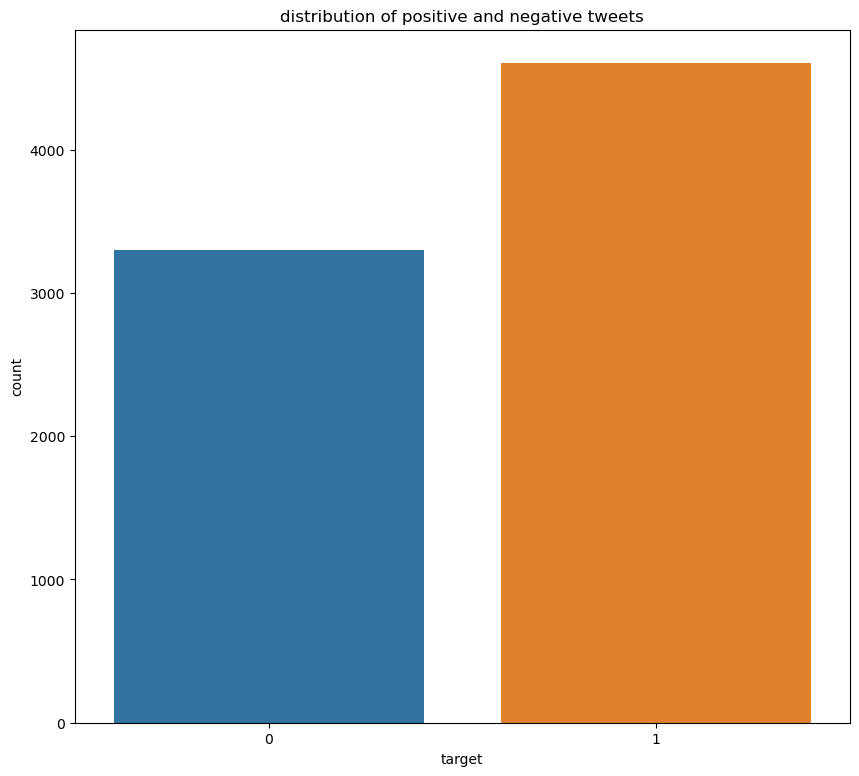

In [19]:
plt.figure(figsize=(10,9))
sns.countplot(data=merg_df, x='target')
plt.title('distribution of positive and negative tweets')
plt.show()

In [20]:
merg_df.head()

,target,clean_tweets
7000,0,modi govt pressur pakistan releas wg cdr abhin...
7001,1,dear modi imrankhanpti pleas listen global lea...
7002,1,joke centuri bjp nomin modi nobel peac prize
7003,1,karnataka bjp chief b yeddyurappa airstrik hel...
7004,0,rameesrammu congress bro damn lucki are make j...


In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
merg_df['num_char']=merg_df['clean_tweets'].apply(len)

In [24]:
merg_df.head()

,target,clean_tweets,num_char
7000,0,modi govt pressur pakistan releas wg cdr abhin...,168
7001,1,dear modi imrankhanpti pleas listen global lea...,97
7002,1,joke centuri bjp nomin modi nobel peac prize,44
7003,1,karnataka bjp chief b yeddyurappa airstrik hel...,66
7004,0,rameesrammu congress bro damn lucki are make j...,63


In [25]:
# num of words
merg_df['num_words'] = merg_df['clean_tweets'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
merg_df.head()

,target,clean_tweets,num_char,num_words
7000,0,modi govt pressur pakistan releas wg cdr abhin...,168,27
7001,1,dear modi imrankhanpti pleas listen global lea...,97,15
7002,1,joke centuri bjp nomin modi nobel peac prize,44,8
7003,1,karnataka bjp chief b yeddyurappa airstrik hel...,66,11
7004,0,rameesrammu congress bro damn lucki are make j...,63,10


In [27]:
merg_df['num_sentences'] = merg_df['clean_tweets'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
merg_df.head()

,target,clean_tweets,num_char,num_words,num_sentences
7000,0,modi govt pressur pakistan releas wg cdr abhin...,168,27,1
7001,1,dear modi imrankhanpti pleas listen global lea...,97,15,1
7002,1,joke centuri bjp nomin modi nobel peac prize,44,8,1
7003,1,karnataka bjp chief b yeddyurappa airstrik hel...,66,11,1
7004,0,rameesrammu congress bro damn lucki are make j...,63,10,1


In [29]:
merg_df[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,7905.000000,7905.000000,7905.0
mean,135.441872,20.778242,1.0
std,70.567128,10.145838,0.0
min,4.000000,1.000000,1.0
25%,84.000000,13.000000,1.0
50%,132.000000,20.000000,1.0
75%,174.000000,27.000000,1.0
max,821.000000,97.000000,1.0


<AxesSubplot:xlabel='num_char', ylabel='Count'>

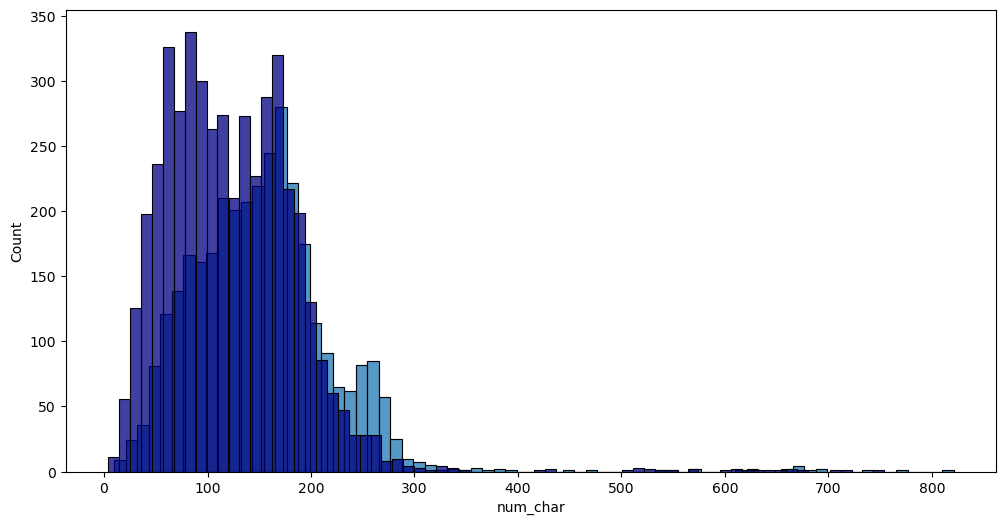

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(merg_df[merg_df['target'] == 0]['num_char'])
sns.histplot(merg_df[merg_df['target'] == 1]['num_char'],color='navy')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

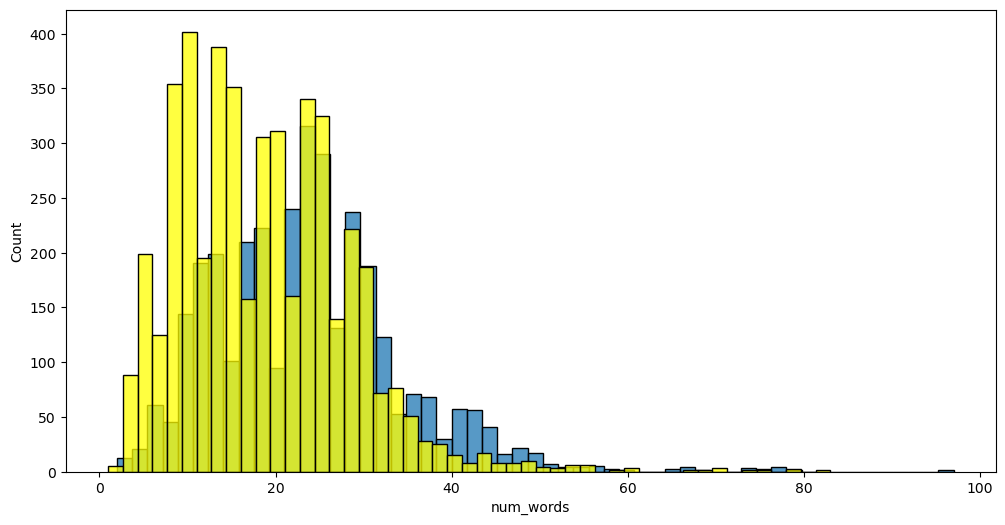

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(merg_df[merg_df['target'] == 0]['num_words'])
sns.histplot(merg_df[merg_df['target'] == 1]['num_words'],color='yellow')

In [32]:
merg_df.duplicated().sum()

0

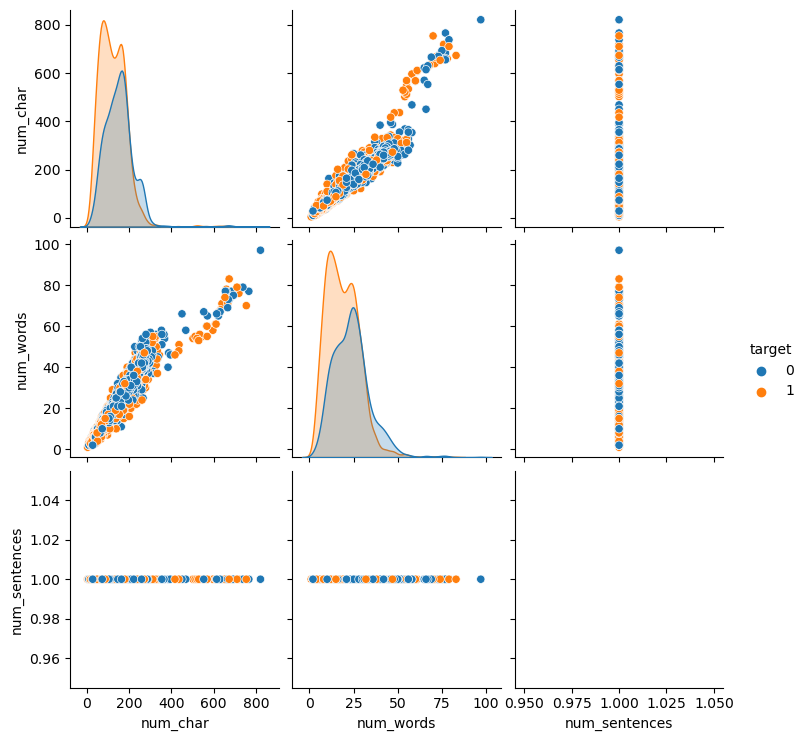

In [33]:
sns.pairplot(merg_df,hue='target')

<AxesSubplot:>

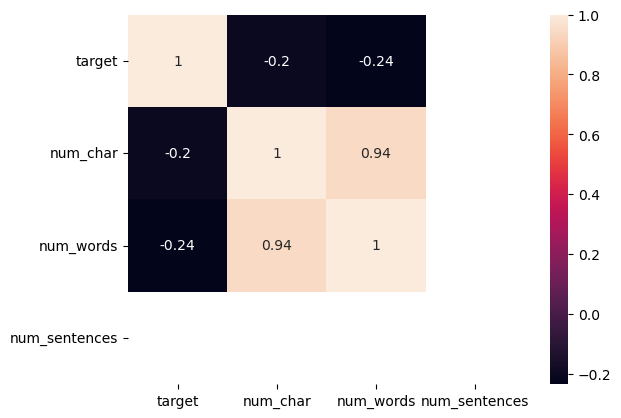

In [34]:
sns.heatmap(merg_df.corr(),annot=True)

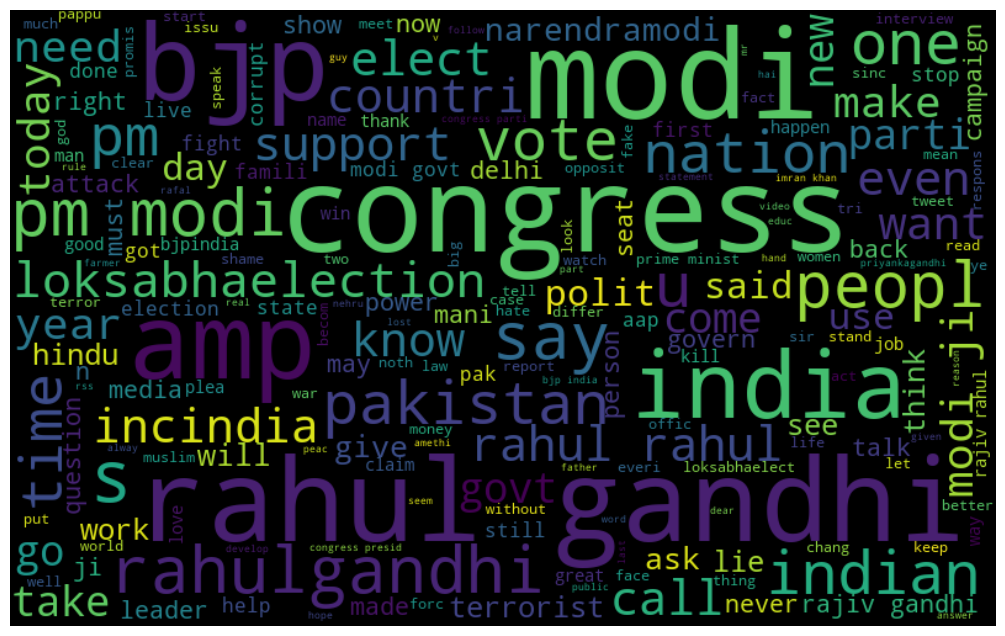

In [35]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in  merg_df['clean_tweets']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Data preprocessing

.Lower case .Tokenization .Removing special characeters .Removing stop words and punctuation .stemming

In [36]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [38]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
def transform_text(clean_tweets):
    clean_tweets = clean_tweets.lower()
    clean_tweets = nltk.word_tokenize(clean_tweets)
    
    y = []
    for i in clean_tweets:
        if i.isalnum():
            y.append(i)
    
    clean_tweets = y[:]
    y.clear()
    
    for i in clean_tweets:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    clean_tweets = y[:]
    y.clear()
    
    for i in clean_tweets:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [40]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore t")

'gon na home soon want talk stuff anymor'

In [41]:
merg_df['transformed_tweets'] = merg_df['clean_tweets'].apply(transform_text)

In [42]:
merg_df.sample(4)

,target,clean_tweets,num_char,num_words,num_sentences,transformed_tweets
15423,1,gt parti congress someon sent note khrushchev ...,165,28,1,gt parti congress someon sent note khrushchev ...
8412,0,import shivsena want inform mani terrorist die...,178,23,1,import shivsena want inform mani terrorist die...
13069,1,nationallibraryweek fina visit librari congres...,63,6,1,nationallibraryweek fina visit librari congres...
16297,0,modi received about three times more tvairtime...,224,28,1,modi receiv three time tvairtim cprahul gandhi...


In [43]:
neg_corpus = []
for msg in merg_df[merg_df['target'] == 1]['transformed_tweets'].tolist():
    for word in msg.split():
        neg_corpus.append(word)
        

In [44]:
len(neg_corpus)

80648

In [45]:
pos_corpus = []
for msg in merg_df[merg_df['target'] == 0]['transformed_tweets'].tolist():
    for word in msg.split():
        pos_corpus.append(word)

In [46]:
len(pos_corpus)

67421

First Model To Predict Neg or Pos Comment

In [47]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer(max_features=20000)

In [48]:
X = cv.fit_transform(merg_df['transformed_tweets']).toarray()

In [49]:
X.shape

(7905, 18612)

In [50]:
y = merg_df['target'].values

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [53]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
gnb = GaussianNB()
bnb = BernoulliNB()

In [55]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'MNB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'GBDT':gbdt,
    'gnb' : GaussianNB(),
    'bnb' : BernoulliNB()
    
}

In [56]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    f_score = f1_score(y_test,y_pred)
    
    return accuracy,f_score

In [57]:
accuracy_scores = []
f1_score_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_f1_score = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("f_score - ",current_f1_score)
    
    accuracy_scores.append(current_accuracy)
    f1_score_scores.append(current_f1_score)

For  SVC
Accuracy -  0.5648323845667299
f_score -  0.6312968917470525
For  KN
Accuracy -  0.6065781151170145
f_score -  0.7408333333333333
For  MNB
Accuracy -  0.7444655281467426
f_score -  0.7755555555555556
For  DT
Accuracy -  0.6869070208728653
f_score -  0.7822261328640564
For  LR
Accuracy -  0.8538899430740038
f_score -  0.8796248045857217
For  RF
Accuracy -  0.8222643896268185
f_score -  0.8515583729529846
For  AdaBoost
Accuracy -  0.7912713472485768
f_score -  0.8372781065088758
For  GBDT
Accuracy -  0.7419354838709677
f_score -  0.8091674462114126
For  gnb
Accuracy -  0.538899430740038
f_score -  0.49758787043418334
For  bnb
Accuracy -  0.7545857052498419
f_score -  0.8046324269889225


In [58]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'f1_score':f1_score_scores}).sort_values('f1_score',ascending=False)

In [59]:
performance_df

,Algorithm,Accuracy,f1_score
4,LR,0.853890,0.879625
5,RF,0.822264,0.851558
6,AdaBoost,0.791271,0.837278
7,GBDT,0.741935,0.809167
9,bnb,0.754586,0.804632
3,DT,0.686907,0.782226
2,MNB,0.744466,0.775556
1,KN,0.606578,0.740833
0,SVC,0.564832,0.631297
8,gnb,0.538899,0.497588


In [60]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'f1_score':f1_score_scores}).sort_values('f1_score',ascending=False)

**Training on complete data**

I have tried with almost all classification algorithm only extratreeclassifier gave me 84 percent accuracy on 64400 rows

In [61]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/Bhupendra1770/Sentimental-Analysis-BJP-vs-Congress/main/transformed_data.csv")
data.drop("Unnamed: 0",axis=1,inplace=True)

In [62]:
data.sample(5)

,target,Party,clean_tweets,num_char,num_words,num_sentences,transformed_tweets
55474,0,0,rahulgandhi so ur next tweet must be on august...,108,16,1,rahulgandhi ur next tweet must augustawestland...
26555,0,1,has congress amp rahul gandhi have enough guts...,209,25,1,congress amp rahul gandhi enough gut contest p...
52223,1,0,rahulgandhi he will be promoted thats how bjp ...,51,9,1,rahulgandhi promot that bjp work
29275,0,1,news dotcom cnnnews if modi is accountable ...,206,34,1,news dotcom cnnnew modi account crime hindu co...
39163,1,0,whoever want long put mind heart it estudyant ...,209,40,1,whoever want long put mind heart estudy sa uma...


In [63]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=17000)
X = cv.fit_transform(data['transformed_tweets']).toarray()
y = data['target'].values

In [64]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

**ExtraTreesClassifier**

In [65]:
from sklearn.ensemble import ExtraTreesClassifier

In [66]:
ext = ExtraTreesClassifier()
ext.fit(X_train,y_train)
y_pred = ext.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
f_score = f1_score(y_test,y_pred)
print(accuracy)
print(f_score)

0.8402521008403361
0.8528523879557242


**Testing comment Negative or Positive**

In [67]:
str = "shudhanshu trivedi ji doing well work good knowlegde he has"
#str = "rahul gandhi not thinking about our country reputation it seems that he make fun of indian democracy on foriegn stage it is really very bad"
#str = "when party gets nothing in delhi legislative assembly then only way to create a supremacy is to take down by using central power aap bjp arvindkejriwal aajtak freespeech delhiliquorscam waiting for the right decision,216,34,1,parti get noth delhi legisl assembl way creat supremaci take use central power aap bjp arvindkejriw aajtak freespeech delhiliquorscam wait right decis"
#str =  "arrest of manish sisodia massive protest outside bjp office jammu manishsisodiaarrested manishsisodia jammu bjp bjp jnk msisodia,128,17,1,arrest manish sisodia massiv protest outsid bjp offic jammu manishsisodiaarrest manishsisodia jammu bjp bjp jnk msisodia"


trans_tweet = transform_text(str)
tweet = cv.transform([trans_tweet])


In [68]:
result = ext.predict(tweet)
if result == 1:
    print("Its a Positive comment")
else:
    print("Its a Negative comment")

Its a Positive comment
